<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Projet : Analyse de sentiments </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

Description du projet
Analyser les sentiments d’une critique de films peut donner un aperçu sur l’impact du film sur la personne (positif/négatif).
L’objectif est d’implémenter un modèle de Deep learning qui réalise l’analyse de sentiments
Jeu de données disponible ici: 
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

<h2>1 - Explore and visualize data</h2>

<h3>Import library</h3>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import pandas as pd
import nltk
from nltk.stem.snowball import EnglishStemmer
from sklearn.model_selection import train_test_split
# punctuation
import string 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h3>Import data from CSV</h3>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv', sep=',', header=0)
print('Shape: ', df.shape)

df.head()

Shape:  (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<h3>Replace sentiment as boolean</h3>

In [9]:
df.sentiment = df.sentiment.replace('positive',1)
df.sentiment = df.sentiment.replace('negative',0)

<h3>verification de l'équilibrage</h3>

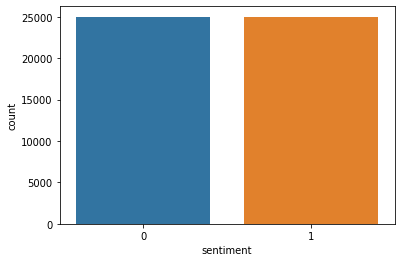

In [10]:
sns.countplot(x="sentiment", data=df);

<h3>check duplicates</h3>

In [11]:
df[df.duplicated(['review'],keep=False)].sort_values(by=['review'])

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",0
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",0
29956,"""Three"" is a seriously dumb shipwreck movie. M...",0
31488,"""Three"" is a seriously dumb shipwreck movie. M...",0
47527,"""Witchery"" might just be the most incoherent a...",0
...,...,...
47876,this movie sucks. did anyone notice that the e...,0
44122,"well, the writing was very sloppy, the directi...",0
23056,"well, the writing was very sloppy, the directi...",0
10163,"when I first heard about this movie, I noticed...",1


<h3>Clean duplicates</h3>

In [12]:
df = df.drop_duplicates(subset=['review'])

<h3>Print lines to check data</h3>

In [13]:
def print_lines(n, col_name = 'review'):
    
    index = np.random.randint(0, df.shape[0], n)

    for i in index:
        print('sentiment:', df['sentiment'].loc[i])
        print('review:', df[col_name].loc[i])
        print()

In [14]:
print_lines(5)

sentiment: 0
review: 'Home Alone 3' is the first of the Home Alone movies not to feature Culkin in the main role and the same villains. However, the plot is very similar to the original 'Home Alone' film. Instead of two comical villains, we get three or four of them. This film involves some traps, but it also has a long scene with a remote-control car. The slapstick humour is consistent as well, but the young boy and the villains really fail to make an impact in this film. (No pun intended.) This film offers nothing new or different than the previous films did, and there really is not the warm, holiday feeling or subplots that the other two films had. It's more of a pure comedy, but it did not succeed in making me laugh as the characters really did not do it for me. I would not recommend this film; it's pretty boring. If you are seeking a good holiday family film with comedy, then watch the original 'Home Alone' movie.

sentiment: 1
review: There is an old saying that relates to the ro

<h3>Import stop words</h3>

In [15]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

stop_words.update([",", ".", "?", ":", "/", "http", "https", '@', '#','<br />','br'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'hadn', 'which', 'yours', 'myself', "hadn't", 'on', 'him', 'more', 'aren', 'above', 'whom', "it's", "that'll", 'don', 'she', 'why', 'he', "you'll", 'their', 'doesn', 'most', "won't", 'who', 'doing', "wasn't", 'again', 'has', 'below', 'shan', 'between', 'did', 'under', "shan't", "didn't", 's', 'my', 'been', 'am', 'down', 'out', 'all', 'as', 'they', 'if', 'ma', 'can', 'what', 'weren', 'being', 'theirs', 'once', 'o', 'haven', 'because', 'from', 'after', 'there', "should've", 'mightn', 'very', 'needn', 'her', 'some', 'than', 'does', 'each', 'this', 'now', 'against', 'further', 'nor', "mightn't", 'no', 'not', 'yourself', 'be', 'them', 'should', "don't", 'its', 'couldn', 'before', "doesn't", 'didn', 'hasn', "aren't", "shouldn't", 'both', "weren't", 'but', 'in', "you'd", 'herself', 'through', 'ourselves', 'here', 'those', 'to', 'ours', 'your', 'where', 'own', 'having', 'll',

<h3>Clean text !</h3>

In [16]:
import nltk
nltk.download('punkt')

txt_clean = []
for i in df.index:
    comment = df["review"][i].lower()
    comment = word_tokenize(comment, language='english')
    comment_clean = []
    for w in comment:
        if (w not in stop_words) and (w.isalpha() or w.isnumeric()) and len(w)>1:
            comment_clean.append(w)
    txt_clean.append(" ".join(comment_clean))

df['text_clean'] = txt_clean

print_lines(5, col_name='text_clean')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
sentiment: 0
review: watched version pathetic american maybe made much worse could make film pretty bad anyway seemed low budget visuals reminded second rate tv movie random white dog substituted dogmatix embarrassing 60 bbc costumes etc mainly though feel like characters movie behave anything like characters comic result never felt willing even try forgive poor look film always going hard capture feel comics film without using animation feel attempt worth ultimately

sentiment: 0
review: beautiful country big disappointment come expectation bihn tall muscular guy son american gi vietnamese woman vietnam war told treated less dust vietnam early fleeted america seek american sounds like heart broken material maybe showing film find hard time connect bihn emotionally film full cliché simply understand believe writing film total failure plot full holes grabs events needed basis t

<h3>Vizualize words frequence</h3>

In [17]:
from nltk import FreqDist

train_string = ' '.join(df['text_clean'])
splits = train_string.split() 
freq_splits = FreqDist(splits)
print('50 most common words \n', freq_splits.most_common(100), '\n')

50 most common words 
 [('movie', 84295), ('film', 76337), ('one', 51397), ('like', 38839), ('good', 28526), ('would', 26254), ('even', 24560), ('time', 23277), ('really', 22823), ('see', 22420), ('story', 22180), ('much', 18845), ('well', 18795), ('could', 18330), ('get', 18113), ('people', 17791), ('great', 17778), ('also', 17739), ('bad', 17627), ('first', 17045), ('made', 15310), ('make', 15205), ('way', 14986), ('movies', 14678), ('think', 14154), ('characters', 14041), ('watch', 13502), ('character', 13485), ('films', 13361), ('many', 13309), ('seen', 13007), ('two', 12935), ('never', 12779), ('love', 12521), ('acting', 12473), ('plot', 12364), ('best', 12294), ('know', 12218), ('little', 12206), ('show', 12155), ('life', 11814), ('ever', 11605), ('better', 11033), ('man', 10953), ('still', 10699), ('say', 10607), ('scene', 10566), ('end', 10538), ('scenes', 10137), ('something', 9809), ('go', 9603), ('back', 9219), ('watching', 8933), ('thing', 8931), ('real', 8903), ('actors', 

In [18]:
def visualize_freq(df, n=30):
    
    tokens = []
    for i in df.index:
        t = df["text_clean"][i].split()
        tokens = tokens + t
    
    freq = FreqDist(tokens)
    top_words = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:n]  # descending order

    plt.figure(figsize=(10, 5))
    freq.plot(n, cumulative=False)
    plt.show()

    return top_words

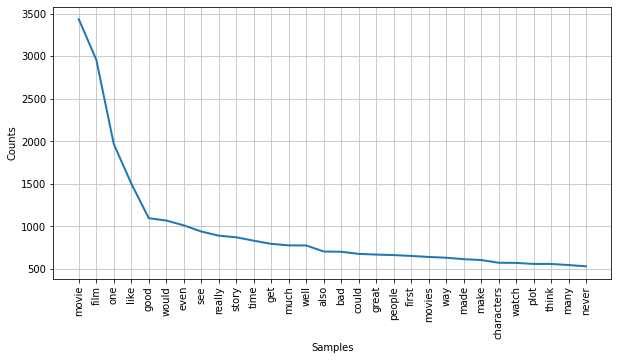

In [19]:
top_words = visualize_freq(df.head(2000))

<h3>Visualize through Sentiment :</h3>

sentiment=negative: 


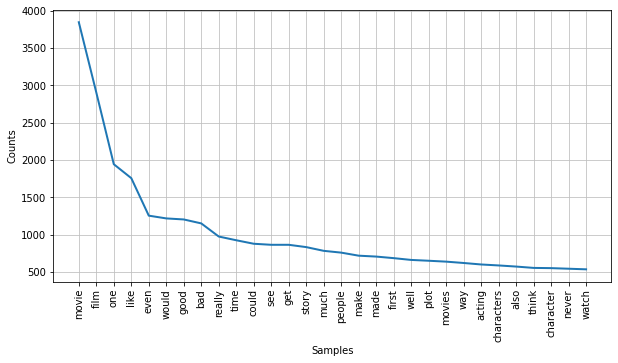

sentiment=positive: 


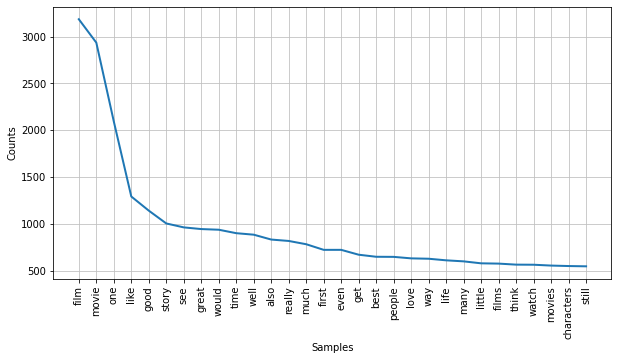

In [20]:
print("sentiment=negative: ")
top_words_0 = visualize_freq(df[df['sentiment']==0].head(2000))
print("sentiment=positive: ")
top_words_1 = visualize_freq(df[df['sentiment']==1].head(2000))

<h3>Verify comment lenght</h3>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


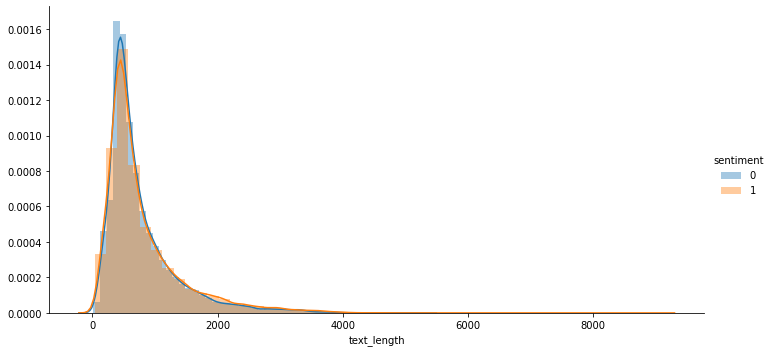

In [21]:
df["text_length"] = df["text_clean"].apply(lambda x: len(x))

g = sns.FacetGrid(data = df, hue ="sentiment",height=5, aspect=2)
g.map(sns.distplot, "text_length")
g.add_legend();

<h3>Stemming</h3>

In [22]:
import nltk
from nltk.stem.snowball import EnglishStemmer

def stim(text):
    text = word_tokenize(text) 
    stemmer = EnglishStemmer()
    stemmerized = ' '.join([stemmer.stem(word) for word in text])
    return stemmerized

df["text_clean"] = df["text_clean"].apply(stim)

sentiment=negative: 


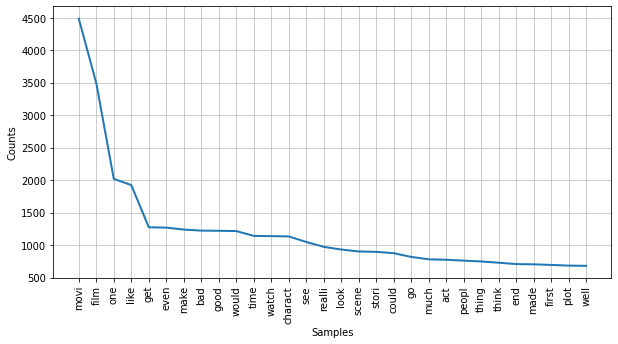

sentiment=positive: 


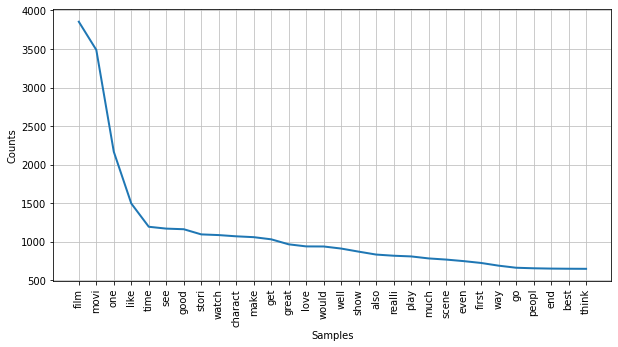

In [23]:
print("sentiment=negative: ")
top_words_0 = visualize_freq(df[df['sentiment']==0].head(2000))
print("sentiment=positive: ")
top_words_1 = visualize_freq(df[df['sentiment']==1].head(2000))

<h3>See the 50 most command words</h3>

In [24]:
from nltk import FreqDist

train_string = ' '.join(df['text_clean'])
splits = train_string.split() 
freq_splits = FreqDist(splits)
print('50 most common words \n', freq_splits.most_common(50), '\n')

50 most common words 
 [('movi', 98974), ('film', 92030), ('one', 53175), ('like', 43797), ('time', 29814), ('good', 28951), ('make', 28438), ('get', 27542), ('see', 27539), ('charact', 27529), ('watch', 27121), ('would', 26254), ('even', 25039), ('stori', 24249), ('realli', 22823), ('scene', 20704), ('well', 19309), ('show', 19262), ('look', 19147), ('bad', 18911), ('much', 18846), ('could', 18330), ('great', 18322), ('end', 18160), ('peopl', 17980), ('also', 17739), ('go', 17644), ('love', 17621), ('think', 17274), ('first', 17213), ('play', 16961), ('act', 16788), ('way', 16505), ('thing', 16101), ('made', 15311), ('know', 14854), ('say', 14769), ('seem', 14710), ('mani', 13348), ('work', 13136), ('plot', 13066), ('want', 13016), ('seen', 13009), ('actor', 12995), ('two', 12935), ('come', 12909), ('take', 12867), ('never', 12779), ('tri', 12318), ('best', 12310)] 



<h3>See it in a worldcloud</h3>

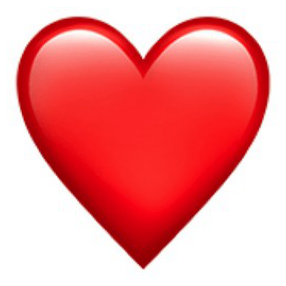

In [25]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


url = "https://www.elle.ci/wp-content/uploads/2020/05/red-heart.jpg"


response = requests.get(url)
img = Image.open(BytesIO(response.content))

# displaying the image
plt.figure(figsize= (10,5))
plt.imshow(img)
plt.axis('off');

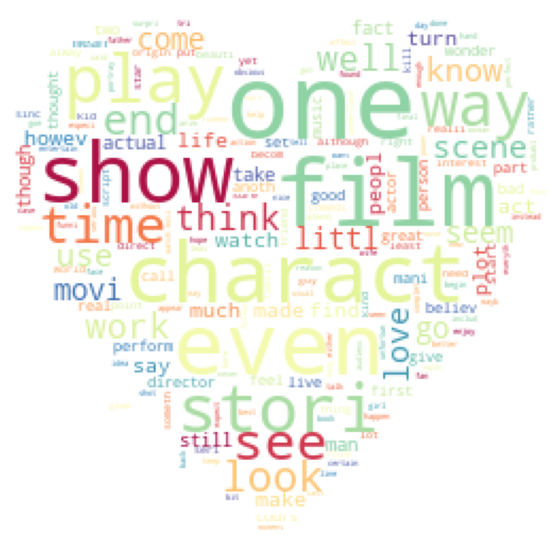

In [26]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=400, mask = np.array(img), colormap=plt.cm.Spectral, max_font_size=50, random_state=42)

txt_clean = " ".join(df['text_clean'])
wc.generate(txt_clean)

plt.figure(figsize= (20,10))
plt.imshow(wc)
plt.axis('off');

LDA

In [36]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer().fit(df["text_clean"])

data_vectorized = vectorizer.transform(df["text_clean"])

lda_model = LatentDirichletAllocation(n_components=4).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [37]:
print_topics(lda_model, vectorizer)


Topic 0:
[('modesti', 14.731002732213783), ('killjoy', 8.617875899667606), ('fido', 8.548959316125577), ('geena', 7.719926598344461), ('doesnt', 7.406016888712723), ('dieter', 6.8846567936208105), ('blais', 6.724660681468459), ('scamp', 5.455440138442345), ('basterd', 5.152473325416102), ('lommel', 4.274171240595554)]
Topic 1:
[('columbo', 34.64884827557345), ('bollywood', 30.324709628986), ('khan', 24.12514949928005), ('india', 18.741708849669816), ('che', 16.392567333344488), ('garbo', 16.33530144602754), ('akshay', 16.187413518933113), ('salman', 16.142493665976712), ('hindi', 14.884661491701081), ('muppet', 14.50515150082977)]
Topic 2:
[('ponyo', 10.771484087635029), ('rhett', 9.53843557189391), ('bsg', 8.80540929080504), ('miyazaki', 8.626121591221624), ('scarlett', 8.311407473539488), ('tweeti', 6.2200305489390475), ('caprica', 6.096790042287476), ('pepe', 5.955946406433076), ('kusturica', 5.058755896389143), ('haruhi', 4.683009247737365)]
Topic 3:
[('movi', 2755.52251812952), ('

In [38]:

example = ["actrice"]
example_vectorized = vectorizer.transform(example)

lda_vectors = lda_model.transform(example_vectorized)
print("topic 0 :", lda_vectors[0][0])
print("topic 1 :", lda_vectors[0][1])
print("topic 2 :", lda_vectors[0][2])
print("topic 3 :", lda_vectors[0][3])

topic 0 : 0.25
topic 1 : 0.25
topic 2 : 0.25
topic 3 : 0.25
